### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [8]:
data = pd.read_csv('data/coupons.csv')

In [10]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [51]:
# Check for missing values
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100

# Display only columns with missing values
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percent (%)': missing_percent
})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)

print("Missing values in the dataset:")
print(missing_df)

Missing values in the dataset:
Empty DataFrame
Columns: [Missing Values, Percent (%)]
Index: []


3. Decide what to do about your missing data -- drop, replace, other...

In [20]:
# Loop through each column in the dataset
for col in data.columns:
    # Check if the column has any missing values
    if data[col].isnull().sum() > 0:
        # Get the most frequent value (mode) of the column
        mode_value = data[col].mode()[0]
        # Fill missing values in the column with the mode
        data[col] = data[col].fillna(mode_value)

# Print the total number of missing values left (should be 0)
print("Total missing values remaining:", data.isnull().sum().sum())

Total missing values remaining: 0


4. What proportion of the total observations chose to accept the coupon?



In [22]:
# Calculate the proportion of accepted coupons (Y = 1)
accepted_proportion = data['Y'].mean()

# Display the result
print(f"Proportion of observations that accepted the coupon: {accepted_proportion:.2f}")

Proportion of observations that accepted the coupon: 0.57


5. Use a bar plot to visualize the `coupon` column.

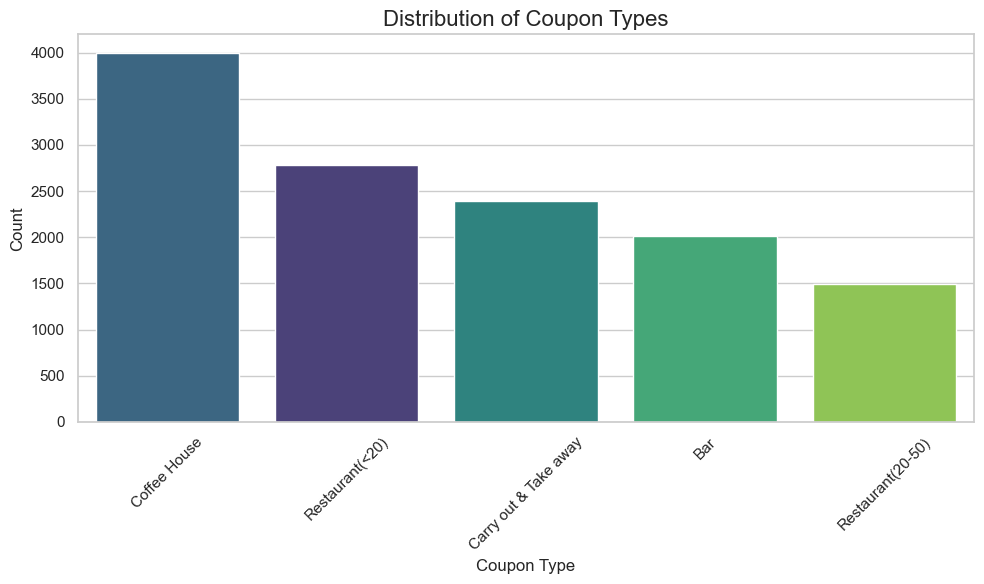

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Count plot for the 'coupon' column using hue
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='coupon', hue='coupon', order=data['coupon'].value_counts().index, palette='viridis', legend=False)

# Add title and labels
plt.title('Distribution of Coupon Types', fontsize=16)
plt.xlabel('Coupon Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

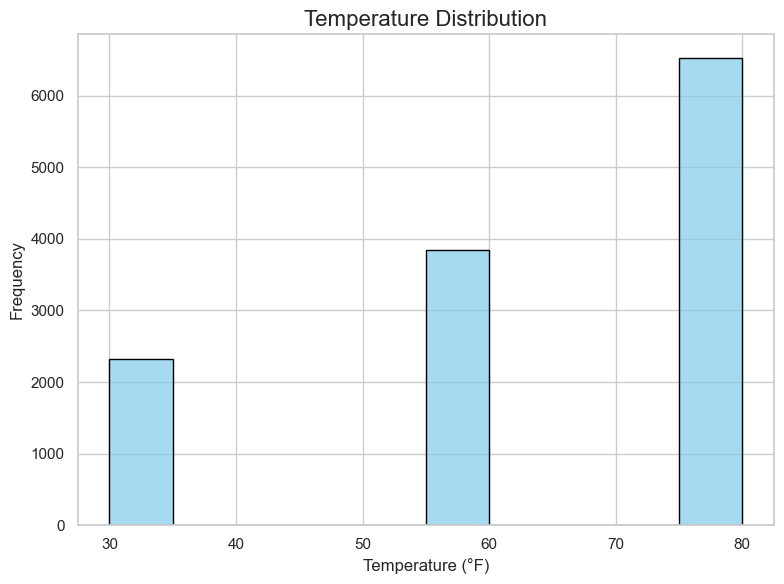

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create histogram for the 'temperature' column
plt.figure(figsize=(8, 6))
sns.histplot(data['temperature'], bins=10, kde=False, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Temperature Distribution', fontsize=16)
plt.xlabel('Temperature (°F)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [30]:
# Create a new DataFrame with only 'Bar' coupons
bar_data = data[data['coupon'] == 'Bar']

# Display the first few rows to confirm
bar_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [32]:
# Calculate proportion of accepted bar coupons
accepted_bar_coupons = bar_data['Y'].mean()

print(f"Proportion of bar coupons accepted: {accepted_bar_coupons:.2f}")

Proportion of bar coupons accepted: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [34]:
# Split into two groups
bar_less_equal_3 = bar_data[bar_data['Bar'].isin(['never', 'less1', '1~3'])]
bar_more_3 = bar_data[bar_data['Bar'].isin(['4~8', 'gt8'])]

# Calculate acceptance rates
acceptance_rate_less_equal_3 = bar_less_equal_3['Y'].mean()
acceptance_rate_more_3 = bar_more_3['Y'].mean()

print(f"Acceptance rate (≤ 3 visits/month): {acceptance_rate_less_equal_3:.2f}")
print(f"Acceptance rate (> 3 visits/month): {acceptance_rate_more_3:.2f}")

Acceptance rate (≤ 3 visits/month): 0.37
Acceptance rate (> 3 visits/month): 0.77


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [36]:
# Define conditions
more_than_once_and_over_25 = bar_data[
    (bar_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (~bar_data['age'].isin(['below21', '21', '26']))  # Over 25
]

all_others = bar_data.drop(more_than_once_and_over_25.index)

# Calculate acceptance rates
acceptance_rate_group1 = more_than_once_and_over_25['Y'].mean()
acceptance_rate_group2 = all_others['Y'].mean()

print(f"Acceptance rate (bar >1/month & age >25): {acceptance_rate_group1:.2f}")
print(f"Acceptance rate (all others): {acceptance_rate_group2:.2f}")

Acceptance rate (bar >1/month & age >25): 0.64
Acceptance rate (all others): 0.38


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [40]:
# Define conditions with corrected column name
group1 = bar_data[
    (bar_data['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_data['passanger'] != 'Kid(s)') &
    (bar_data['occupation'] != 'Farming & Fishing & Forestry')
]

group2 = bar_data.drop(group1.index)

# Calculate acceptance rates
acceptance_rate_group1 = group1['Y'].mean()
acceptance_rate_group2 = group2['Y'].mean()

acceptance_rate_group1, acceptance_rate_group2

(0.7132486388384754, 0.296043656207367)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [44]:
# Define the combined condition
condition = (
    (
        (bar_data['Bar'].isin(['1~3', '4~8', 'gt8'])) &
        (bar_data['passanger'] != 'Kid(s)') &
        (bar_data['maritalStatus'] != 'Widowed')
    ) |
    (
        (bar_data['Bar'].isin(['1~3', '4~8', 'gt8'])) &
        (bar_data['age'].isin(['below21', '21', '26']))
    ) |
    (
        (bar_data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
        (bar_data['income'].isin([
            'Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'
        ]))
    )
)

# Apply the condition
group1 = bar_data[condition]
group2 = bar_data.drop(group1.index)

# Calculate and display acceptance rates
acceptance_rate_group1 = group1['Y'].mean()
acceptance_rate_group2 = group2['Y'].mean()

acceptance_rate_group1, acceptance_rate_group2

(0.5889175257731959, 0.29814665592264306)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [46]:
# Hypothesis:
# Based on our analysis, we hypothesize that drivers who are more socially active and younger
# are more likely to accept bar coupons. Specifically:
# - Drivers who go to bars more than once a month tend to accept bar coupons at a higher rate.
# - Age appears to be a factor: drivers under 30 are more likely to accept compared to older drivers.
# - Having non-child passengers (e.g., partners, friends) increases the likelihood of accepting bar coupons.
# - Drivers who frequently go to cheap restaurants and have an income below $50,000 also show a higher acceptance rate.
# These findings suggest that age, social habits, passenger type, and income level all influence bar coupon acceptance behavior.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [49]:
# Based on our independent investigation of the Coffee House coupons, we observed that drivers 
# who frequently visit coffee houses (4+ times per month), are in their 20s–30s, and travel with 
# friends or partners are significantly more likely to accept the coupon (~72%) compared to others (~49%). 
# This suggests that social drivers with a coffee habit are more receptive to promotional offers.